# Cosmological Horizons

In the previous article, 'Data Visualization of the Observable Universe', we visualized all the galaxies that we have in the data and went through the observable universe at different distances on two animations that we made. 

We've prepared and saved the data. With it ready, we can dive deeper into the different cosmology topics.

Today, we will focus on some properties of the observable universe. Let's talk about cosmological horizons - physical limits to information retrieval, stemming from the speed of light and the expansion of the universe[1].

We are going to talk about three of them.

First, let's import all the libraries.

In [1]:
import astropy

import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM

import matplotlib.pyplot as plt
import numpy as np

# Particle horizon

This is the boundary of the observable universe[5]. It is a result of the limited speed of light and the expansion of the universe. Simply put, we can't see beyond the particle horizon, because the light would not have enough time since the beginning of the Universe to reach us. 

So, how far is the particle horizon now? 

If you search for it, the most common number you will see will be 46.6 billion lightyears. This is a bit odd, because the distance to the particle horizon is extremely cosmology-model-dependent, and the slight variations, for example in the matter density parameter and dark energy density parameter, can move it a few billion lightyears. And there are still many uncertainties in our models.

Because of this dependency, to visualize the particle horizon, we will check the distance ourselves. 

Let's start with initializing our cosmology model. To keep consistency with our data and calculations in the previous text, we will use the same parameters, used in some calculations in HyperLeda (the database which is the source of our data):

In [2]:
cosmo = FlatLambdaCDM(name='HyperLeda', H0=70, Om0=0.27)
cosmo

FlatLambdaCDM(name="HyperLeda", H0=70.0 km / (Mpc s), Om0=0.27, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

This is our model, with a Hubble parameter of 70 km/Mpc/s, a matter density parameter of 0.27, and a dark energy density parameter of…

In [3]:
cosmo.Ode0

0.73

Those values describe the universe's expansion. The age of the Universe in our model:

In [4]:
cosmo.age(0)

<Quantity 13.8663072 Gyr>

We can check how far the particle horizon is from us in our cosmology model by checking the comoving distance for infinite redshift[2][3]:

In [5]:
part_horiz_dist = cosmo.comoving_distance(np.inf).to(u.Glyr)
part_horiz_dist

<Quantity 48.17958066 Glyr>

It is a bit more than 46.6 billion lightyears, but nothing too crazy. Let's roll with it[4].

It's time to load our data:

In [6]:
data = astropy.table.QTable.read(
    './data/data-vis-obj-univ.parquet',
)

And set the style of the visuals, which we will use throughout:

In [7]:
plt.style.use('dark_background')

def set_3d_plot_options(ax):
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    ax.grid(False)

We will need a sphere to visualize the particle horizon. To get it, will use this function:

In [8]:
def plot_sphere(sphere_rad):

    # Create a circle in the XY plane
    theta = np.linspace(0, 2.*np.pi, 100)
    radius = 1
    x1 = sphere_rad * np.cos(theta)
    y1 = sphere_rad * np.sin(theta)
    z1 = np.zeros_like(theta)
    ax.plot(x1, y1, z1, color='white', alpha=0.1)
    
    # Create a circle along the XZ plane
    phi = np.linspace(0, 2.*np.pi, 100)
    x2 = np.zeros_like(phi)
    y2 = sphere_rad * np.cos(phi)
    z2 = sphere_rad * np.sin(phi)
    ax.plot(x2, y2, z2, color='white', alpha=0.1)
    
    
    # Create Sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    
    sphere_x = sphere_rad * np.outer(np.cos(u), np.sin(v))
    sphere_y = sphere_rad * np.outer(np.sin(u), np.sin(v))
    sphere_z = sphere_rad * np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Plot Sphere
    ax.plot_surface(
        sphere_x, 
        sphere_y, 
        sphere_z,  
        rstride=4, 
        cstride=4, 
        color='w', 
        linewidth=0, 
        alpha=0.03,
    )

Now all we have to do is plot the data and add a sphere using the function defined above, with a radius of the particle horizon calculated earlier.

By doing that, we are adding to our visualization a limit to what we assume we could theoretically see at this moment in time. It would look like this:

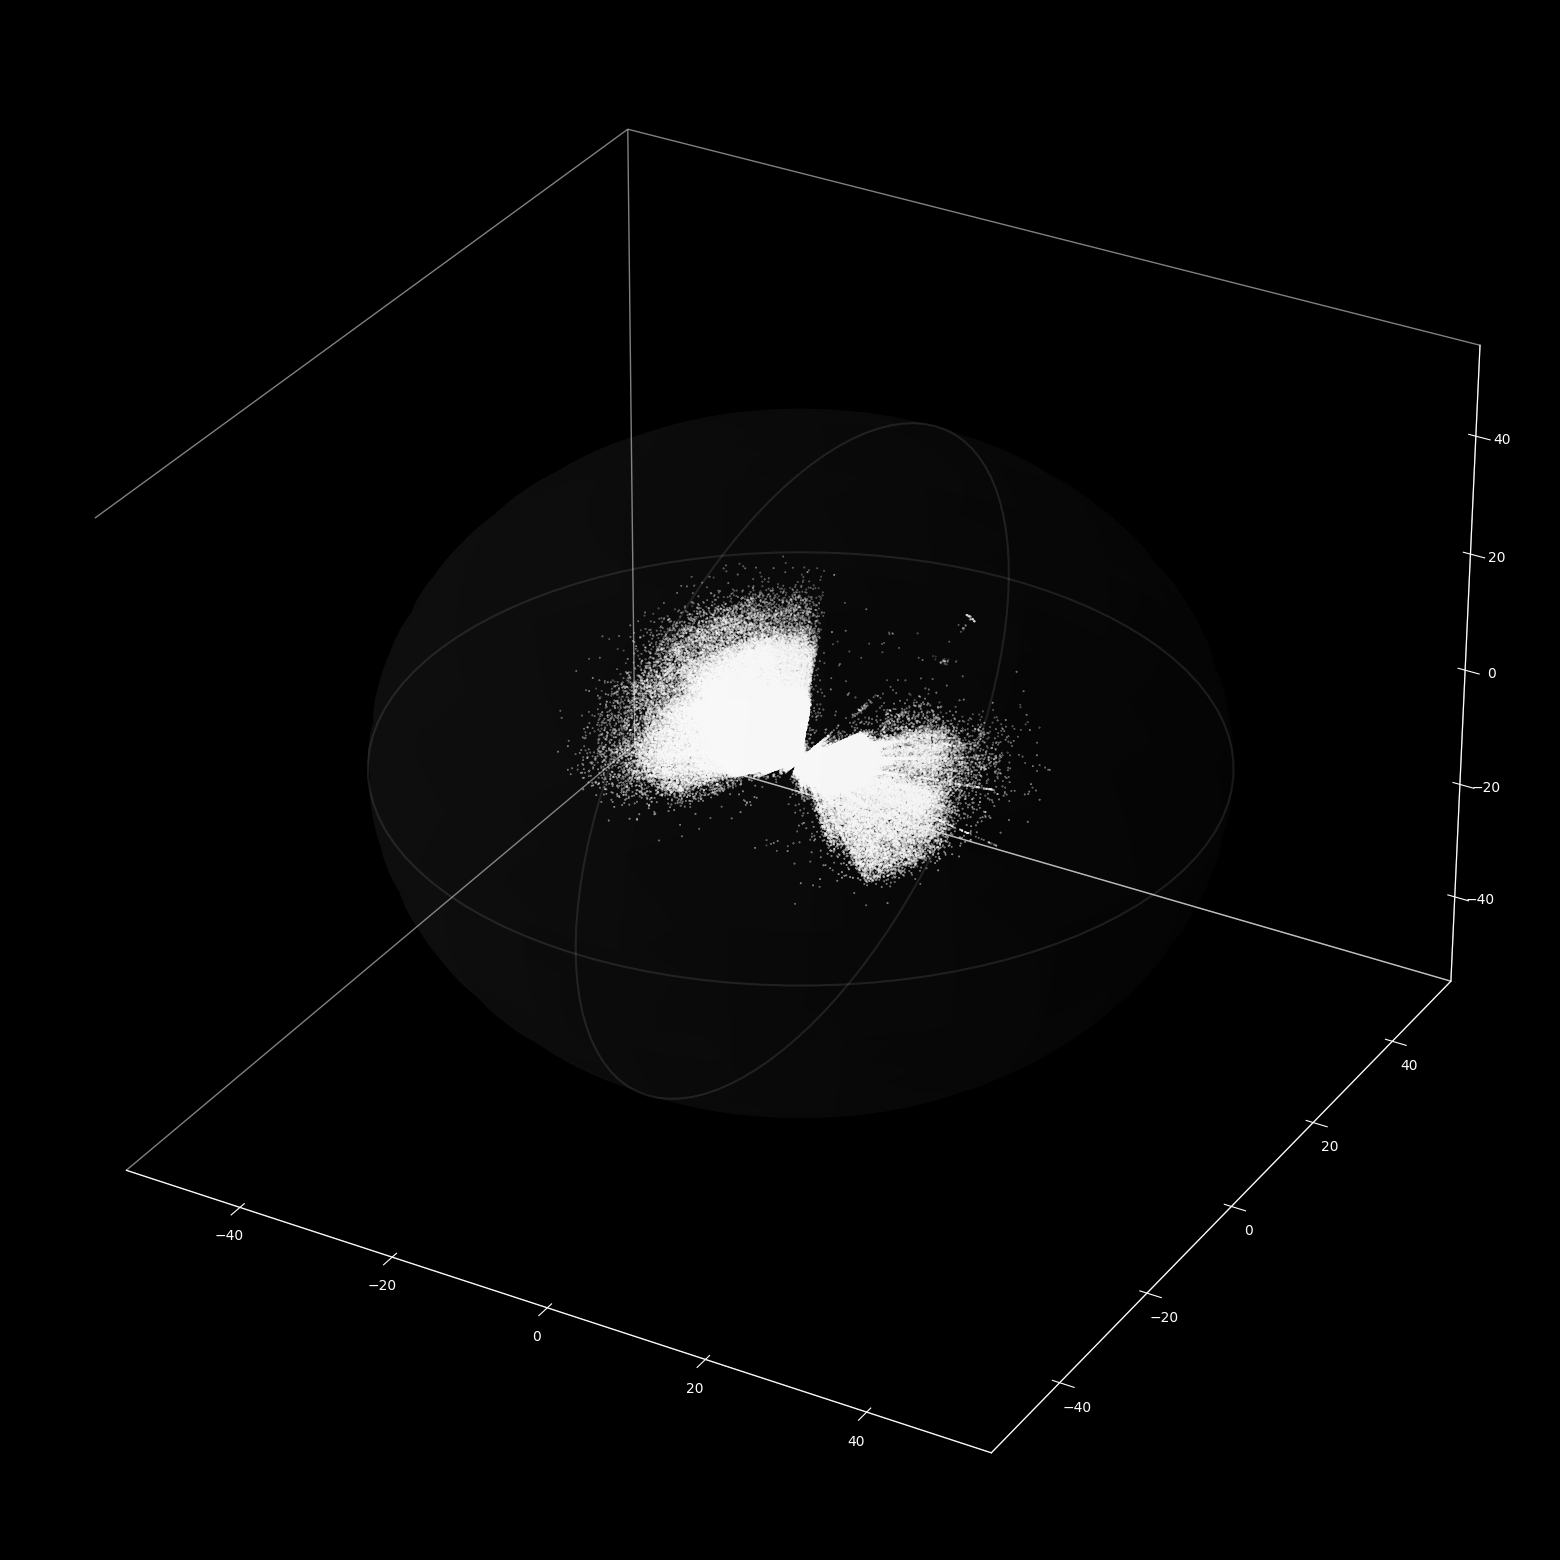

In [9]:
fig, ax = plt.subplots(
    figsize=(20, 20), 
    subplot_kw=dict(projection='3d'),
) 

set_3d_plot_options(ax)
    
ax.scatter3D(
    data['x'], 
    data['y'], 
    data['z'], 
    s=0.1, 
    c='white', 
    alpha=None,
);

plot_sphere(part_horiz_dist.value)

plt.savefig(
    './plots/obs_univ_particle_horizon_3d.png', 
    dpi=300,
)

This is the observable universe. Spherical, from the perspective of Earth (each location in the Universe has its own observable universe).

Estimates placed the number of stars in it at several hundred billion, based on new data from New Horizons[6]. So with our 2.8 million, this is only a small fraction of what we estimate there is. The observable universe limit refers to the physical limit created by the speed of light itself.

Some light emitted in the past outside of the currently observable universe is quite far on its way and will finally reach us. So the observable universe will still get a little bigger. But to a certain limit - any light emitted by objects currently situated beyond a comoving distance of about 62 billion lightyears will never reach Earth[7]. And after some time, when all the light that can reach us already did, the observable universe will start to depopulate, as more galaxies move away with the expansion of the Universe faster than the speed of light.

The limit of the observable universe is marked by the light emitted about 13.8 billion years ago, about 379,000 years after the Big Bang, in the so-called Era of Recombination - a period when first stable atoms are formed and photons start to fly free. Those same photons, redshifted, later become CMB - Cosmic Microwave Background.

# Hubble Sphere

### About redshift…

The universe is expanding, which means anything in red is going further and further away from us.

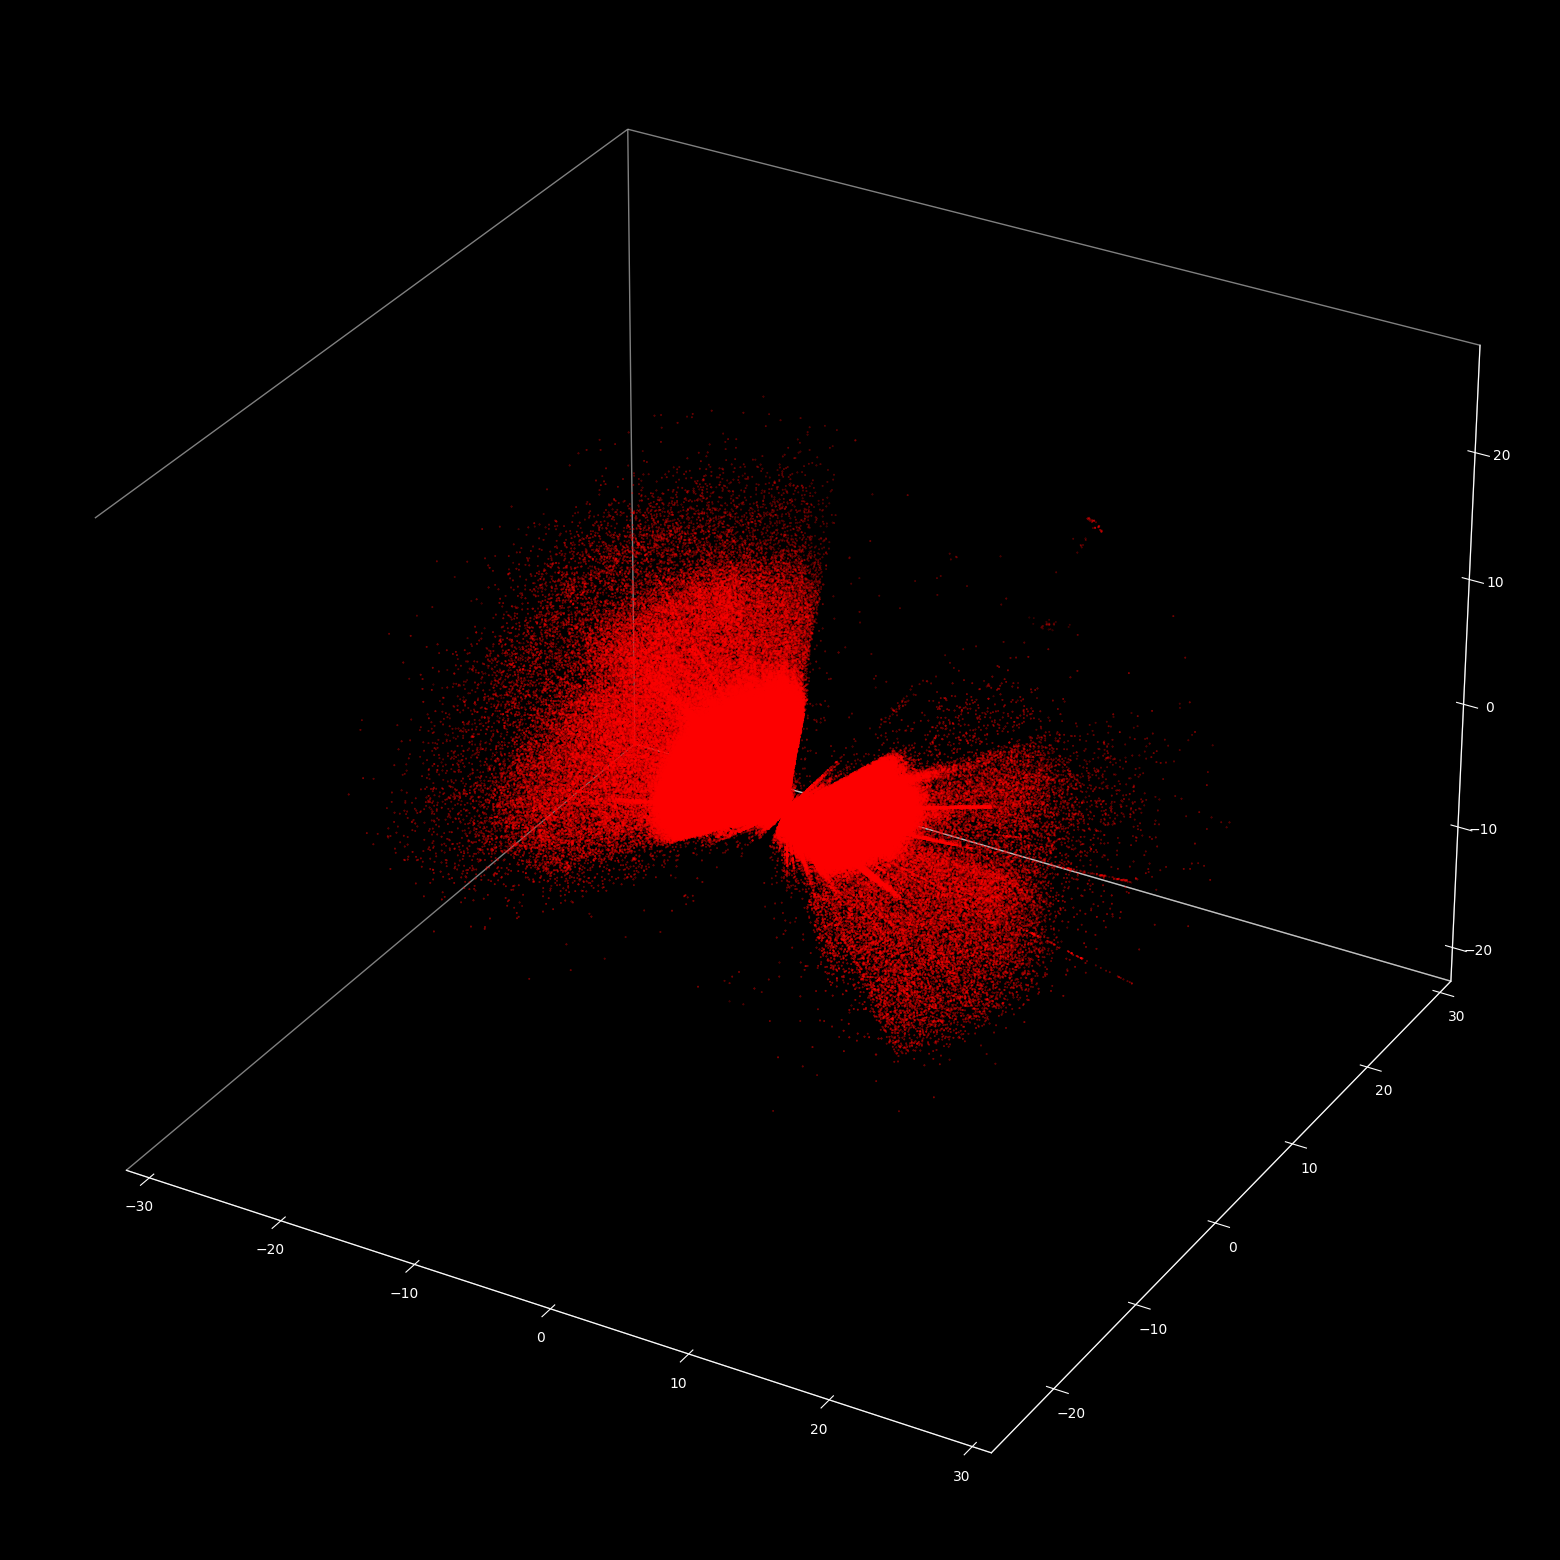

In [10]:
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(projection='3d')) 

set_3d_plot_options(ax)
    
ax.scatter3D(
    data['x'], 
    data['y'], 
    data['z'], 
    s=[0.1 if x > 0 else 1 for x in data['redshift']], 
    c=['red' if x > 0 else 'cyan' for x in data['redshift']], 
    alpha=None,
);

plt.savefig(
    './plots/redshift.png', 
    dpi=300,
)

All the galaxies in the data. The ones in red are moving away from us (image by the author).

In [11]:
print(
    'Number of galaxies without positive redshift:', 
    (data['redshift'] <= 0).sum()
)

Number of galaxies without positive redshift: 98


We can see that a vast majority of stuff is moving away from us (at this scale, we can't even see anything that isn't). The question is, how fast?

### Galaxies moving away from us faster than the speed of light

Hubble horizon (or Hubble sphere, or Hubble volume[8]) divides the objects that move away from the observer slower than the speed of light and objects that move away faster than the speed of light. In a Universe with an accelerating rate of expansion, the Hubble sphere is shrinking as time goes forward. It is not to be confused with cosmic event horizon, as even though some galaxies are moving from us faster than the speed of light, light emitted now by those galaxies will reach us eventually. Only light emitted now from outside of the cosmic event horizon will never reach us. Both those horizons are well within the boundaries of the observable universe.

As we are operating as properly as we can, it's not as easy as marking a line with the radial velocity from our data and checking which is greater than the speed of light and which is not. To do it properly and in line with our distance calculations, we need to solve the equations for Hubble horizon radius.

Again, you might've seen a bit different numbers for the radius of the Hubble horizon or cosmic event horizon. Both depend on the cosmology model you choose to work in and the constants that come with it. You may want to try those calculations on different cosmology if you want to see different results.

To Calculate the Hubble horizon radius, we need the speed of light and the Hubble constant, and divide the former by the latter. To get a comoving Hubble horizon radius we would need Hubble Horizon radius divided by a scale factor, which at t(0) (today) is equal to 1, so we can leave it out of the equation, as comoving Hubble horizon is currently the same for us as Hubble horizon.

Hubble constant:

In [12]:
cosmo.H(0)

<Quantity 70. km / (Mpc s)>

Speed of light:

In [13]:
const.c.to('km/s')

<Quantity 299792.458 km / s>

The calculation for the Hubble horizon radius:

In [14]:
(const.c.to('km/s')/cosmo.H(0)).to('Glyr')

<Quantity 13.96846031 Glyr>

Now, let's plot it:

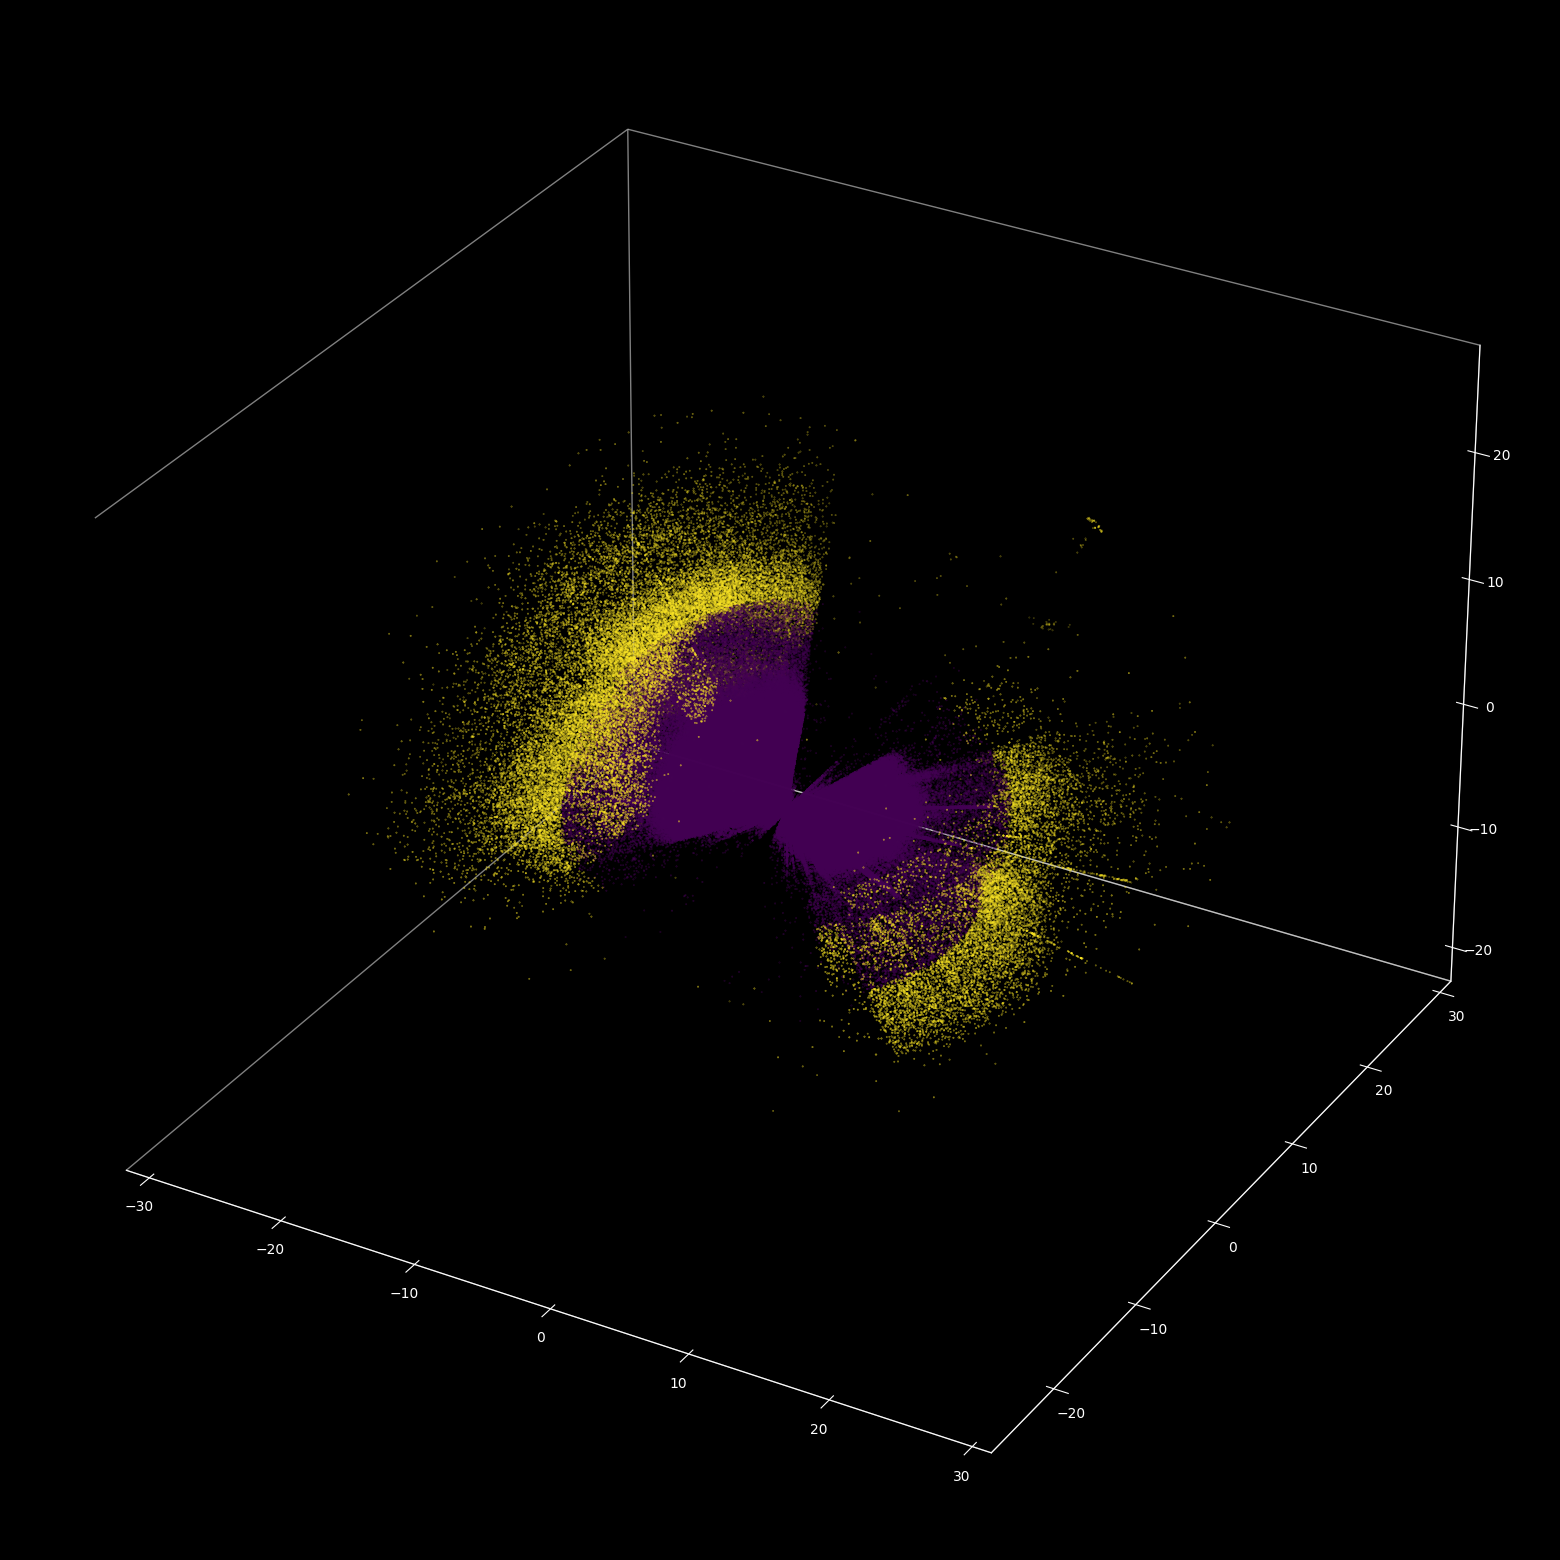

In [15]:
resampled_cmap = plt.cm.viridis.resampled(2)

fig, ax = plt.subplots(
    figsize=(20, 20), 
    subplot_kw=dict(projection='3d'),
) 

set_3d_plot_options(ax)
    
ax.scatter3D(
    data['x'], 
    data['y'], 
    data['z'], 
    s=0.1, 
    c=[resampled_cmap(1) if x.value > 14.105485 else \
       resampled_cmap(0) for x in data['dm']], 
    alpha=None,
);

plt.savefig(
    './plots/hubble_horizon.png', 
    dpi=300,
)

Hubble Horizon. Galaxies in purple are inside. The golden ones move away from us at a speed higher than the speed of light (image by the author).

Everything in purple is inside Hubble's sphere, and everything yellow is moving away from us faster than the speed of light. This doesn't mean that the light emitted from it now will never reach us. To see that, we will need to plot another threshold.

## Cosmic Event Horizon

Have you heard of the theories saying that we might be living in a big, sparse black hole? Well, one thing seems to be certain at least - there is an event horizon.

The cosmic event horizon[9] is a threshold, beyond which we can only see the past. The light emitted now from those galaxies will never reach us (assuming we are indeed in the accelerating expanding universe as per the LambdaCDM model, and the speed of the expansion doesn't slow down in the future).

We need to properly calculate the cosmic event horizon radius, to keep in line with our previous calculations.

Cosmic event horizon can be calculated by dividing the speed of light by (the square root of Omega Lambda (Omega vacuum or Omega dark energy) times Hubble constant):

In [16]:
(const.c.to('km/s')/(np.sqrt(cosmo.Ode0)*cosmo.H(0))).to('Glyr')

<Quantity 16.34884619 Glyr>

There we have it. Let's now add it to the previous plot, next to the Hubble horizon:

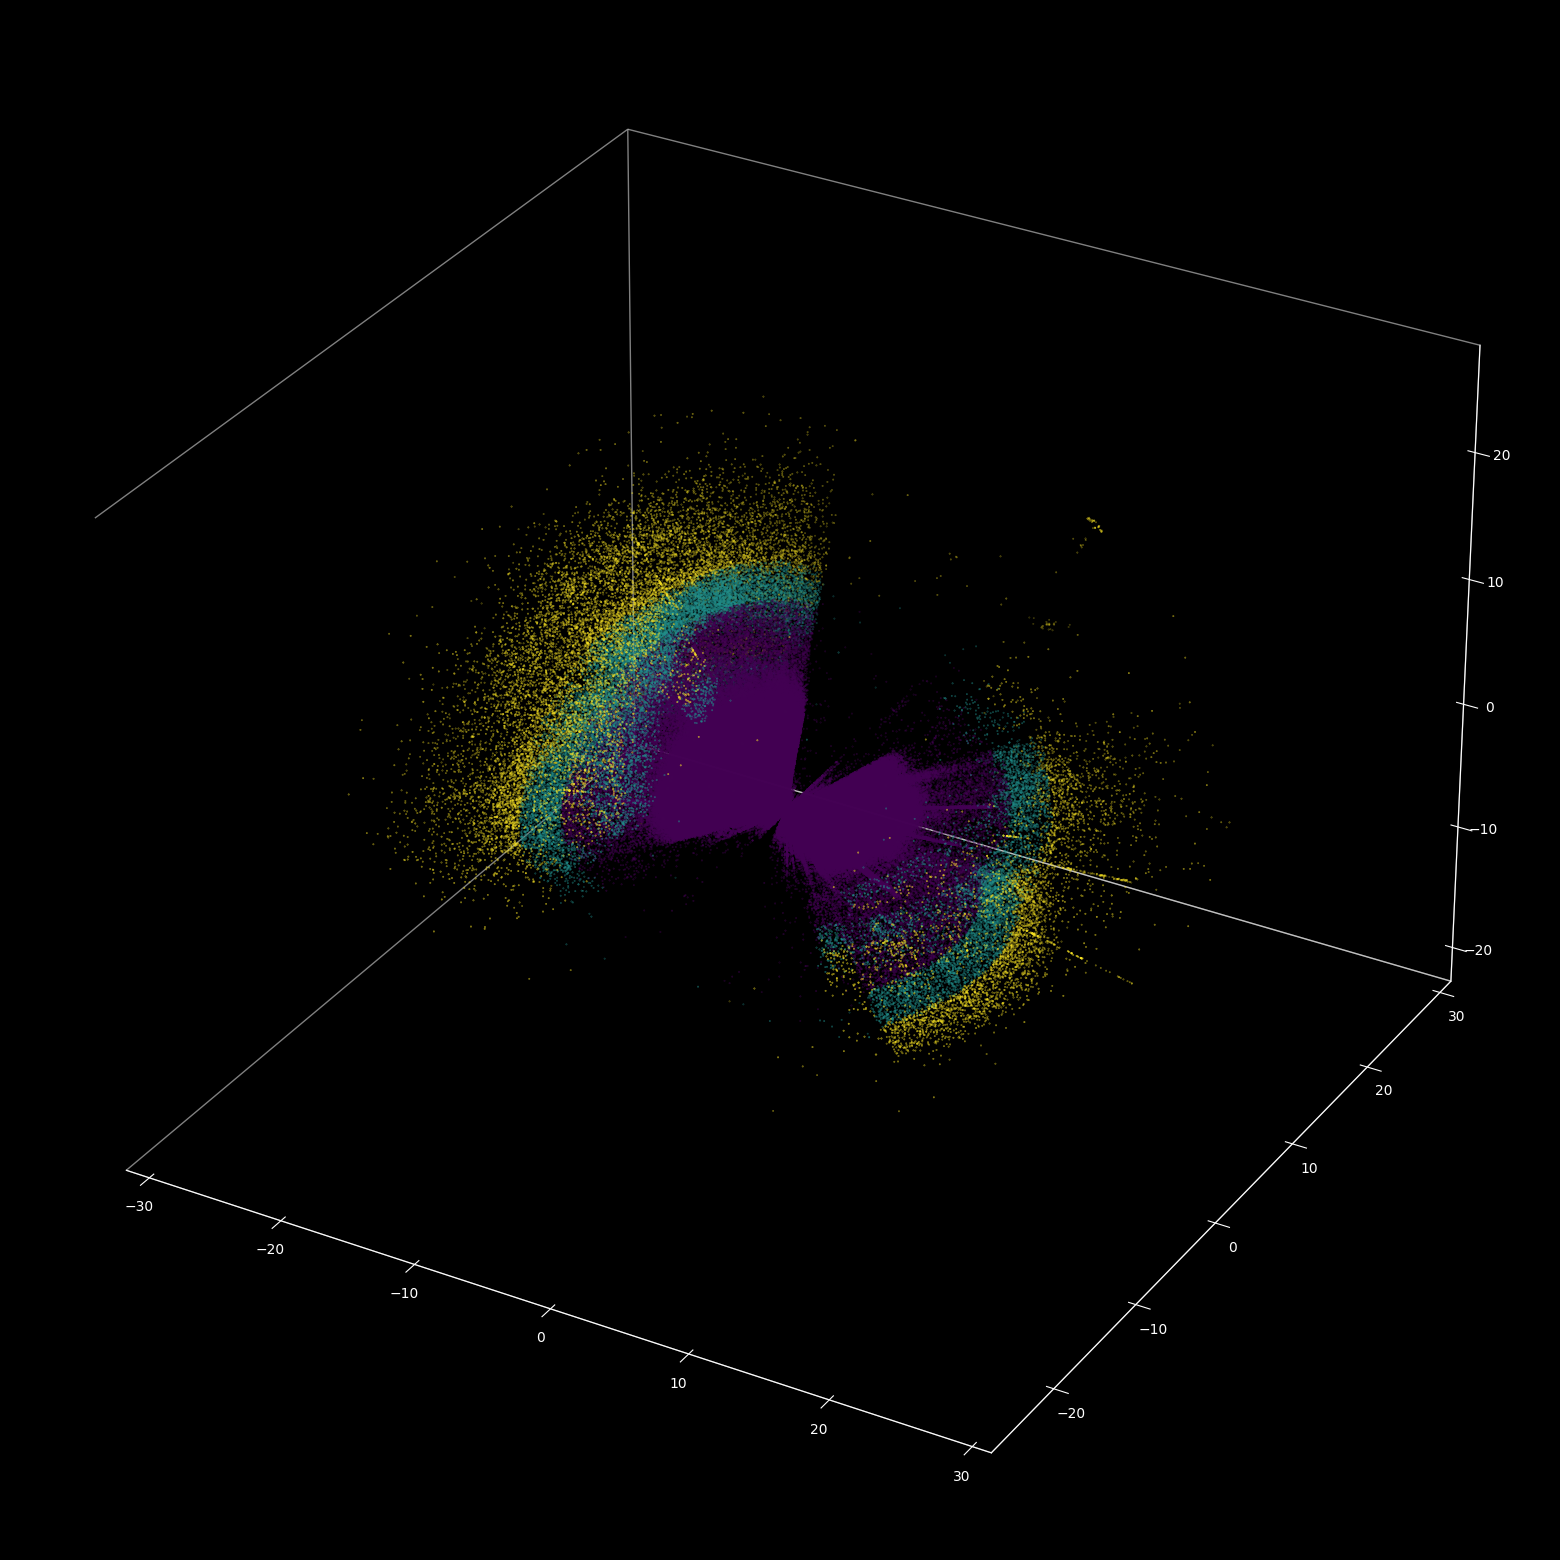

In [17]:
resampled_cmap = plt.cm.viridis_r.resampled(3)

fig, ax = plt.subplots(
    figsize=(20, 20), 
    subplot_kw=dict(projection='3d'),
) 

set_3d_plot_options(ax)
    
ax.scatter3D(
    data['x'], 
    data['y'], 
    data['z'], 
    s=0.1, 
    c=[
        resampled_cmap(2) if x.value < 14.105485 else \
        resampled_cmap(1) if x.value < 16.700039 else \
        resampled_cmap(0) for x in data['dm']
    ], 
    alpha=None,
);

plt.savefig(
    './plots/cosmic_event_horizon.png', 
    dpi=300,
)

Cosmic event horizon and Hubble horizon. Galaxies in purple move away from us at subluminal speeds, the ones in cyan are moving away along the expansion of the universe faster than the speed of light. Galaxies in gold are outside the cosmic event horizon and the light emitted there now will never reach us (image by the author).

The galaxies in purple are moving away from us at a speed lower than the speed of light. Ones in cyan are moving faster than the speed of light, but are still within the cosmic event horizon and the light emitted there now will eventually reach us. The galaxies in yellow are beyond the cosmic event horizon, and even though they are well within our observable universe, there is so much space between them and us, that expansion of the universe will prevent the light emitted in those galaxies now from ever reaching us.

# Conclusion

If the expansion rate doesn't change, within the boundaries of physics as we know it, those horizons put a limit to the current and future observations of the cosmos. In time, almost all of the galaxies will move away beyond the cosmic event horizon. If someone is looking up from somewhere in our galaxy in a very, very distant future, all they will be able to see is our galaxy and the local group, which will probably mostly merge by then. They will have no way of knowing there ever was anything more in the Universe.

I hope you enjoyed thinking about and visualizing cosmological horizons[10][11].

The notebook with the code is available on my GitHub[12].

# References & further reading

Links to Wikipedia are mostly self-explanatory.

[1] More on cosmological horizons: https://en.wikipedia.org/wiki/Cosmological_horizon

If you want to dive deeper into cosmological horizons at different points in the Universe's history, this is the scientific paper that should point the way:

Margalef-Bentabol, B., Margalef-Bentabol, J. and Cepa, J. (2013). Evolution of the cosmological horizons in a universe with countably infinitely many state equations. Journal of Cosmology and Astroparticle Physics, [Online] 2013(02), p.015. Available at: https://doi.org/10.1088/1475-7516/2013/02/015 [Accessed 05/11/2023].

You can also find an un-copyedited pdf version on arxiv: https://arxiv.org/pdf/1302.2186.pdf.

[2] For the relationship between comoving distance and redshift, please refer to the previous text: https://medium.com/cosmic-cartography/data-visualization-of-the-observable-universe-5e4a5af2330

[3] If you are more curious about it, you can follow the below explanation with an instruction on how to implement this in Python:

The distance to the particle horizon in cosmology, which is the maximum distance from which particles could have traveled to the observer in the age of the universe, is not given by a simple equation but rather involves integrating the speed of light over the history of the universe's expansion.

To calculate the comoving distance to the particle horizon, we must integrate the inverse of the Hubble parameter over the redshift. This integration considers the expansion history of the Universe, which is governed by the Friedmann equations within the framework of general relativity. These equations account for various cosmological parameters, such as the Hubble constant H0, the matter density parameter Ωm, the dark energy density ΩΛ, and the curvature of space. The Hubble parameter H(z) encapsulates this expansion history and varies with the redshift z, reflecting the rate at which the universe expands at different epochs.

The equation for the comoving distance Dc to the particle horizon is given by:

$ D_C = c \int_0^\infty \frac{dz}{H(z)} $

In this equation:
- Dc represents the comoving distance to the particle horizon.
- c is the speed of light.
- The integral from 0 to infinity dz over ​H(z)​ sums up the contributions to the distance from all epochs of the universe, from the present day (redshift z=0) to the beginning of the universe (redshift z=∞).
- H(z) is the Hubble parameter as a function of redshift, which reflects the expansion rate of the Universe at different times.

To implement this in Python, we need to define the integrand function.

An integral in calculus is essentially a mathematical tool that allows us to sum up infinitely many infinitesimally small quantities. When we talk about the integral of the inverse of the Hubble parameter over redshift, we're summing up all the tiny slices of distance that light could travel at each infinitesimal step in the redshift (which is related to time).

The term integrand refers to the function that is being integrated. In our case, the integrand is the inverse of the Hubble parameter as a function of redshift, 1/H(z). This integrand function tells us how much 'distance' light could cover at each redshift, accounting for the expansion of the universe at that time.

We define a function integrand that computes 1/H(z) at each redshift z and returns the reciprocal of the Hubble parameter at a given redshift. The Hubble parameter H(z) tells us the rate of expansion of the universe at a given redshift.

In [18]:
def integrand(z):
    Hz = cosmo.H(z).to(1/u.s)
    return (const.c / Hz).to(u.Mpc).value

In the function, cosmo.H(z) calculates the Hubble parameter at redshift z. We convert this to units of inverse seconds (1/s) because the Hubble parameter has dimensions of rate (e.g., km/s/Mpc). We then divide the speed of light by this value, and astropy handles the units to ensure the result is in megaparsecs (Mpc).

Using the quad function from the scipy.integrate library, we integrate the integrand function from z = 0 (the present day) to z = infinity (the beginning of the Universe). This gives us the total conformal time that light has been traveling since the beginning of the Universe.

In [19]:
from scipy.integrate import quad

In [20]:
integral_result, integral_error = quad(integrand, 0, np.inf)

The quad function does the heavy lifting of calculating the area under the curve described by our integrand from z=0 to z=∞, effectively summing up all the "slices" of distance that light has traveled through different epochs of the Universe's history.

The result of the integral is a dimensionless quantity because we have normalized the Hubble parameter with its units. To get the actual distance, we multiply by the units of distance (Mpc) because the speed of light was initially provided in meters, and we convert it to giga-lightyears:

In [21]:
part_horiz_dist = (integral_result * u.Mpc).to(u.Glyr)
part_horiz_dist

<Quantity 48.17958066 Glyr>

[4] You are very welcome to experiment with different cosmology parameters describing the universe's expansion. For example, if you change the matter/dark energy ratio by 0.03, to 0.3 and 0.7 respectively, you will get a particle horizon radius of 46.17 billion lightyears.

[5] https://en.wikipedia.org/wiki/Particle_horizon.

[6] It was actually a decrease in comparison to what was thought previously. You can read about that here: https://observer.com/2021/01/nasa-new-horizons-emptier-darker-than-we-thought/.

A bit more information, that gives some additional information about the light in the observable universe: https://hubblesite.org/contents/news-releases/2021/news-2021-001.
And a different perspective on the number of galaxies in the observable universe, by Ethan Siegel from Starts with a Bang: https://bigthink.com/starts-with-a-bang/galaxies-in-universe/.

[7] https://en.wikipedia.org/wiki/Observable_universe.

[8] https://en.wikipedia.org/wiki/Hubble_volume.

[9] https://en.wikipedia.org/wiki/Event_horizon#Cosmic_event_horizon.

[10] Diana Cowern (Physics Girl) talks about cosmological horizons in my favorite explainer of this topic: https://www.youtube.com/watch?v=q67vH0SKahU. She also made a great video about the expansion of the Universe and the Big Bang: https://www.youtube.com/watch?v=I9q-7GPQr1Y.

[11] If you want to learn more about cosmology, I can recommend the textbook I (am trying to) learn from:
Ryden, B. (2017). Introduction to Cosmology (Second Edition). Cambridge University Press. ISBN 9781107154834.

[12] https://github.com/jan-niedospial/cosm-horiz